In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import pickle
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import keras
import sys


Using TensorFlow backend.


In [2]:
filename = '/home/sxz/data/geolife_Data/paper2_data_for_DL_kfold_dataset_RL.pickle'
with open(filename, 'rb') as f:
    kfold_dataset, X_unlabeled = pickle.load(f)

In [12]:
raw_cluster = np.fromfile("raw_data.bin",dtype=np.float64)

In [13]:
raw_cluster

array([4.72966737e-05, 1.85153173e-02, 6.74826643e-01, ...,
       5.56388435e-01, 6.55849449e-01, 2.77631259e-01])

In [14]:
print(np.array(raw_cluster).shape)

(109120,)


In [19]:
label_ = np.fromfile("raw_label.bin",dtype = np.int64)

In [15]:
raw_cluster = raw_cluster.reshape(110,992)

In [16]:
pca_ = PCA(n_components=2)

In [17]:
encode_ = pca_.fit_transform(raw_cluster)

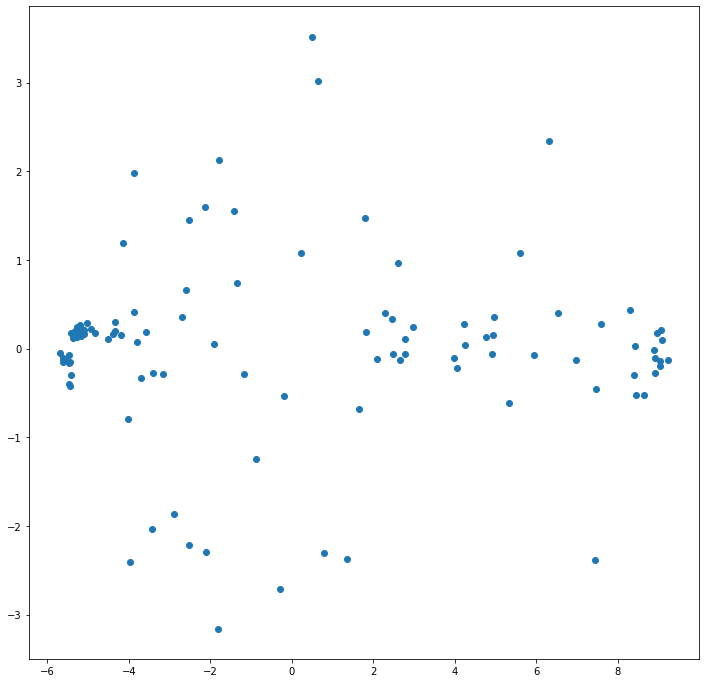

In [18]:
plt.figure(figsize=[12,12])
plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])

(110,)


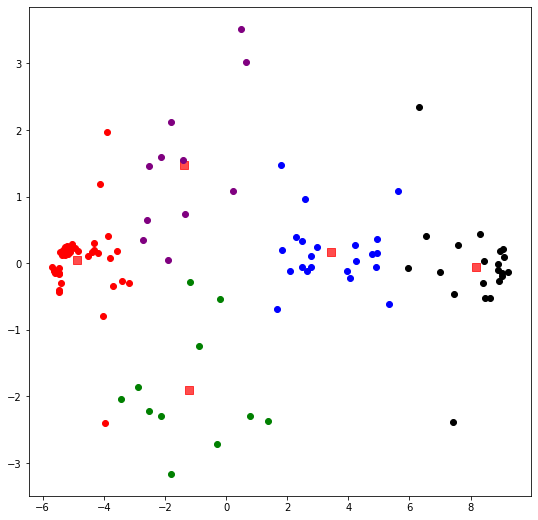

In [20]:
plt.figure(figsize=[9,9])
km5 = KMeans(n_clusters=5, init='random',max_iter=300,n_init=10,random_state=0)
encode_means = km5.fit_predict(encode_)
print(np.array(encode_means).shape)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')

In [21]:
def select_label(cluster_set , cluster_center):
    minimun = 100
    distance = np.sqrt(np.sum(np.square(cluster_set[i] , cluster_center)))

In [22]:
mini = np.zeros((5), dtype=np.float)
mini_coodinate = np.zeros((5,2), dtype=np.float)

In [25]:
mini = [100,100,100,100,100]
count = 0
for j in range(5):
    for i in range(len(encode_[encode_means==j])):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_[encode_means==j][i]
cluster_fake = np.zeros(5,)
for j in range(5):
    for i in range(len(encode_)):
        if(mini_coodinate[j][0] == encode_[i][0]):
            print(i)
            print(label_[i])
            cluster_fake[j] = label_[i]
label_fake = np.zeros(110,)
for i in range(5):
    label_fake[encode_means==i] =cluster_fake[i]
count = 0
for i in range(len(label_)):
    if(label_fake[i] == label_[i]):
        count = count+1
print(count)
print('accuracy for PCA is : {}'.format(count/110))

51
4
28
1
104
4
106
4
42
3
61
accuracy for PCA is : 0.5545454545454546


In [32]:
raw_cluster =[]

In [49]:
kfold_dataset[0][2].shape

(110, 1, 248, 4)

In [50]:
raw_cluster = kfold_dataset[0][2].reshape(110,992)

In [54]:
raw_cluster = np.vstack((raw_cluster, kfold_dataset[4][2].reshape(len(kfold_dataset[4][2]),992)))

In [ ]:
print()

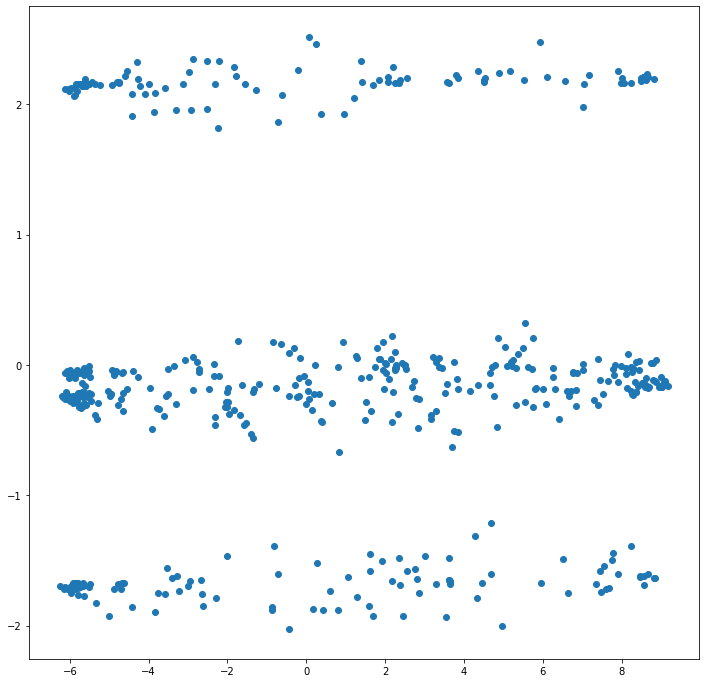

In [55]:
pca_ = PCA(n_components=2)
encode_ = pca_.fit_transform(raw_cluster)
plt.figure(figsize=[12,12])
plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])

(551,)


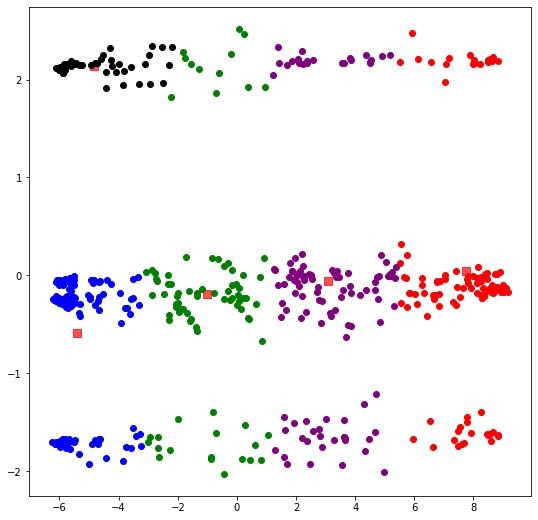

In [56]:
plt.figure(figsize=[9,9])
km5 = KMeans(n_clusters=5, init='random',max_iter=300,n_init=10,random_state=0)
encode_means = km5.fit_predict(encode_)
print(np.array(encode_means).shape)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')

In [57]:
def select_label(cluster_set , cluster_center):
    minimun = 100
    distance = np.sqrt(np.sum(np.square(cluster_set[i] , cluster_center)))

In [59]:
mini = np.zeros((5), dtype=np.float)
mini_coodinate = np.zeros((5,2), dtype=np.float)
mini = [100,100,100,100,100]
count = 0
for j in range(5):
    for i in range(len(encode_[encode_means==j])):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_[encode_means==j][i]
cluster_fake = np.zeros(5,)
for j in range(5):
    for i in range(len(encode_)):
        if(mini_coodinate[j][0] == encode_[i][0]):
            print(i)
            print(label_[i])
            cluster_fake[j] = label_[i]
label_fake = np.zeros(551,)
for i in range(5):
    label_fake[encode_means==i] =cluster_fake[i]
count = 0
for i in range(len(label_)):
    if(label_fake[i] == label_[i]):
        count = count+1
print(count)
print('accuracy for PCA is : {}'.format(count/551))

38
2
169
4
392
4
438
4
203
4
329
accuracy for PCA is : 0.5970961887477314
